In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import geopandas
import dataretrieval.nwis as nwis
import contextily as cx
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/opt/miniconda3/lib/python3.9/site-packages/dataretrieval/nadp.py:44: UserWarning: GDAL not installed. Some functions will not work.
  warnings.warn('GDAL not installed. Some functions will not work.')


In [13]:
uma = geopandas.read_file("../data/mapping/umatilla/globalwatershed.shp")
uma = uma.to_crs(epsg=4269)

rogue = geopandas.read_file("../data/mapping/rogue/layers/globalwatershed.shp")
rogue = rogue.to_crs(epsg=4269)

cedar = geopandas.read_file("../data/mapping/cedar/layers/globalwatershed.shp")
cedar = cedar.to_crs(epsg=4269)

boise = geopandas.read_file("../data/mapping/UpperBoise/globalwatershed.shp")
boise = boise.to_crs(epsg=4269)



In [14]:
states_list = ["Washington","Oregon","Idaho"]
states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states[states["NAME"].isin(states_list)]
states = states.to_crs(epsg=4269)

In [5]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

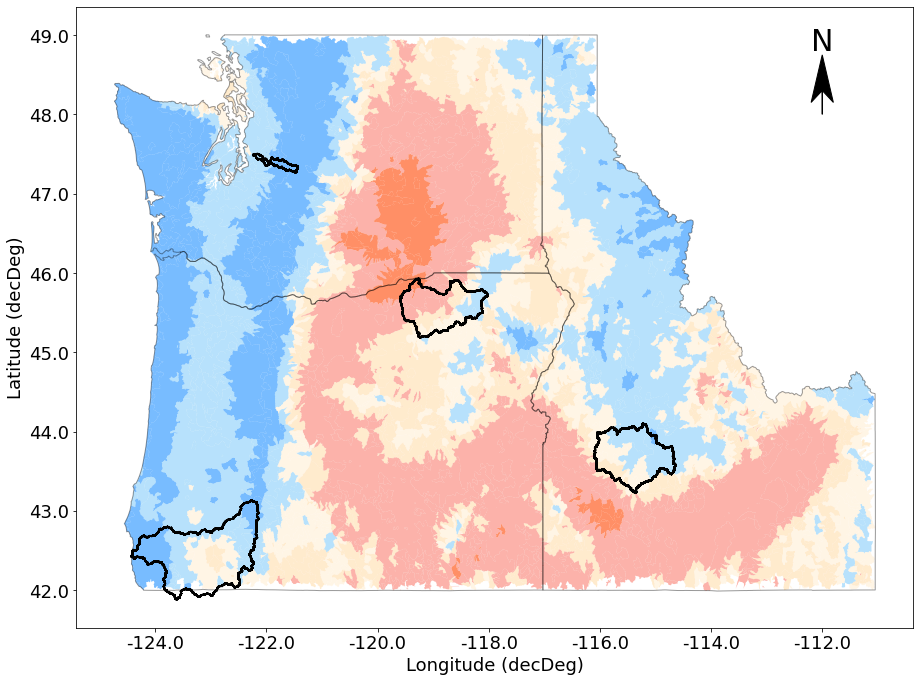

In [26]:
plt.rcParams.update({'font.size': 18})


# xlim = ([states.total_bounds[0],  states.total_bounds[2]])
# ylim = ([states.total_bounds[1],  states.total_bounds[3]])



color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))


pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .6)
uma.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 2)
rogue.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 2)
cedar.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 2)
boise.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 2)

states.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 1,alpha=0.4)

ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-112.2, y=48.8, s='N', fontsize=30)

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))



In [19]:
def plotFocal(df):
    plt.rcParams.update({'font.size': 18})


    xlim = ([df.total_bounds[0],  df.total_bounds[2]])
    ylim = ([df.total_bounds[1],  df.total_bounds[3]])



    color_map = {'W': 'lightskyblue',
              'V': 'dodgerblue' ,
              'D': 'navajowhite',
              'M': 'papayawhip',
              'S': 'salmon' ,
              'A': 'orangered' ,
              'B': 'hotpink' }

    f,ax = plt.subplots(figsize=(15, 15))


    pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .6)
    df.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 2)

    states.plot(ax=ax,edgecolor = "black",facecolor='none',linewidth = 1,alpha=0.4)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    ax.set_xlabel("Longitude (decDeg)")
    ax.set_ylabel("Latitude (decDeg)")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

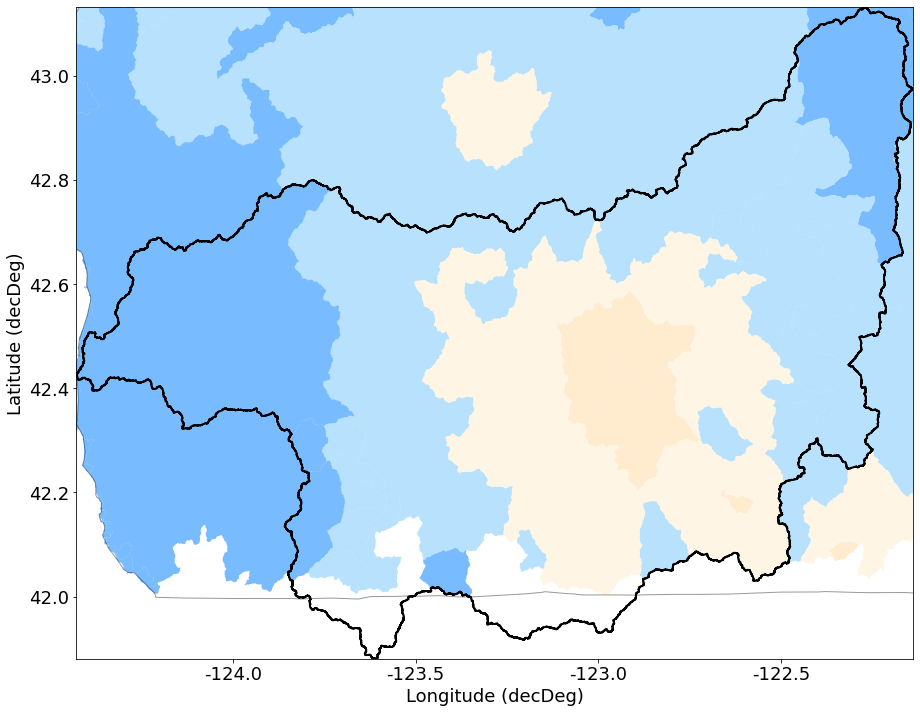

In [21]:
plotFocal(rogue)

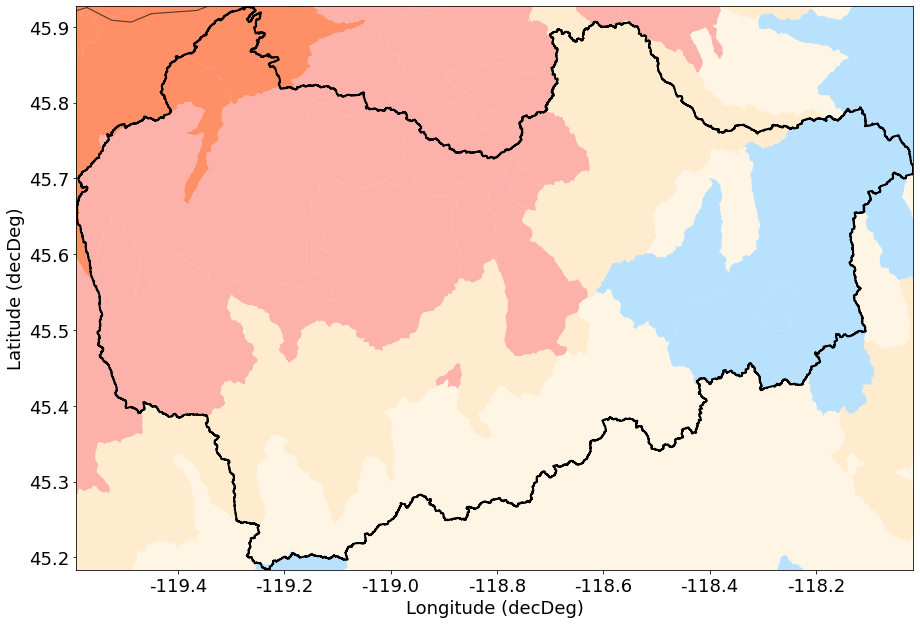

In [22]:
plotFocal(uma)

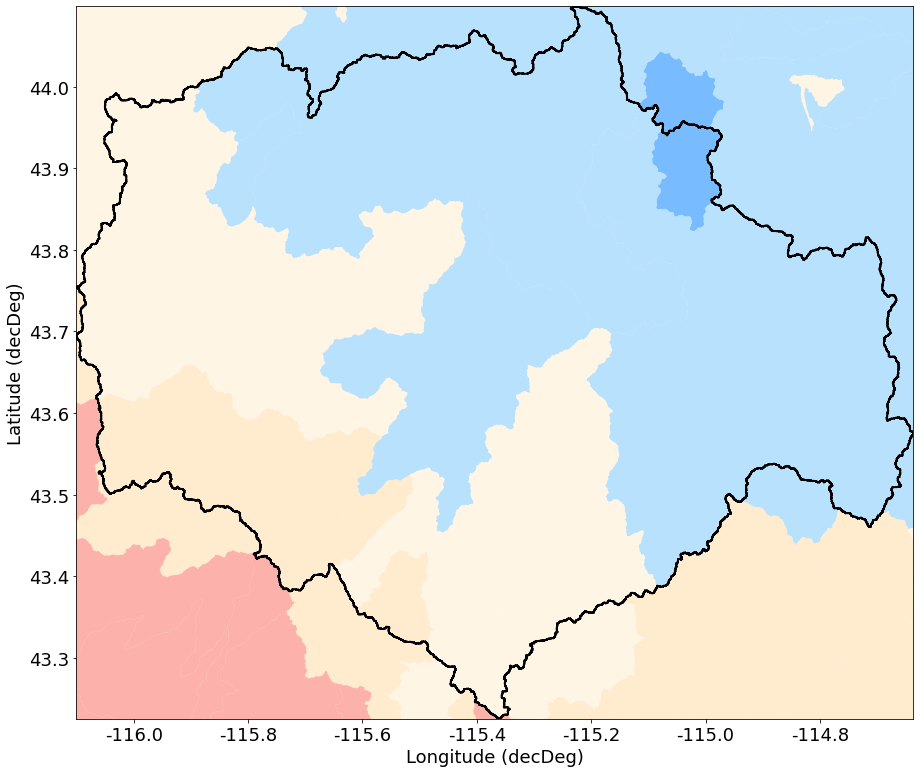

In [23]:
plotFocal(boise)

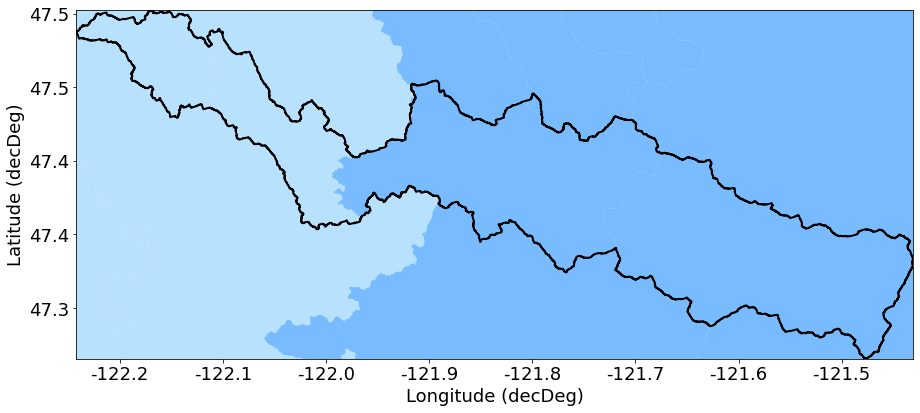

In [24]:
plotFocal(cedar)